# Análise Exploratória de Dados (EDA)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
# Base de Dados
df = pd.read_csv("creditcard.csv")

In [4]:
# Base de Dados
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Numero de linhas e colunas
df.shape

(284807, 31)

In [6]:
# Informações sobres dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

> **Distribuição das Transações da Classe 1 (Fraude)**
---

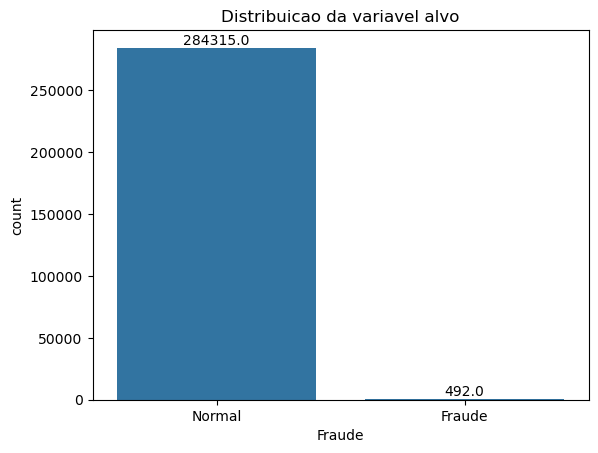

In [7]:
df_class = df.copy()

df_class['Class'] = pd.Categorical(
    df_class['Class'],
    categories=[0,1],
    ordered=True
)

labels = {1: 'Fraude', 0: 'Normal'}
df_class['Class'] = df_class['Class'].map(labels)

dados_sorted = df_class.sort_values('Class', ascending=False)



plt.Figure(figsize=(10,5))

ax = sns.countplot(data=dados_sorted, x='Class')
plt.title("Distribuicao da variavel alvo")
plt.xlabel("Fraude")



# Adding counts on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.grid(False)
plt.show()
plt.show()


** Os dados estão muito desbanleado

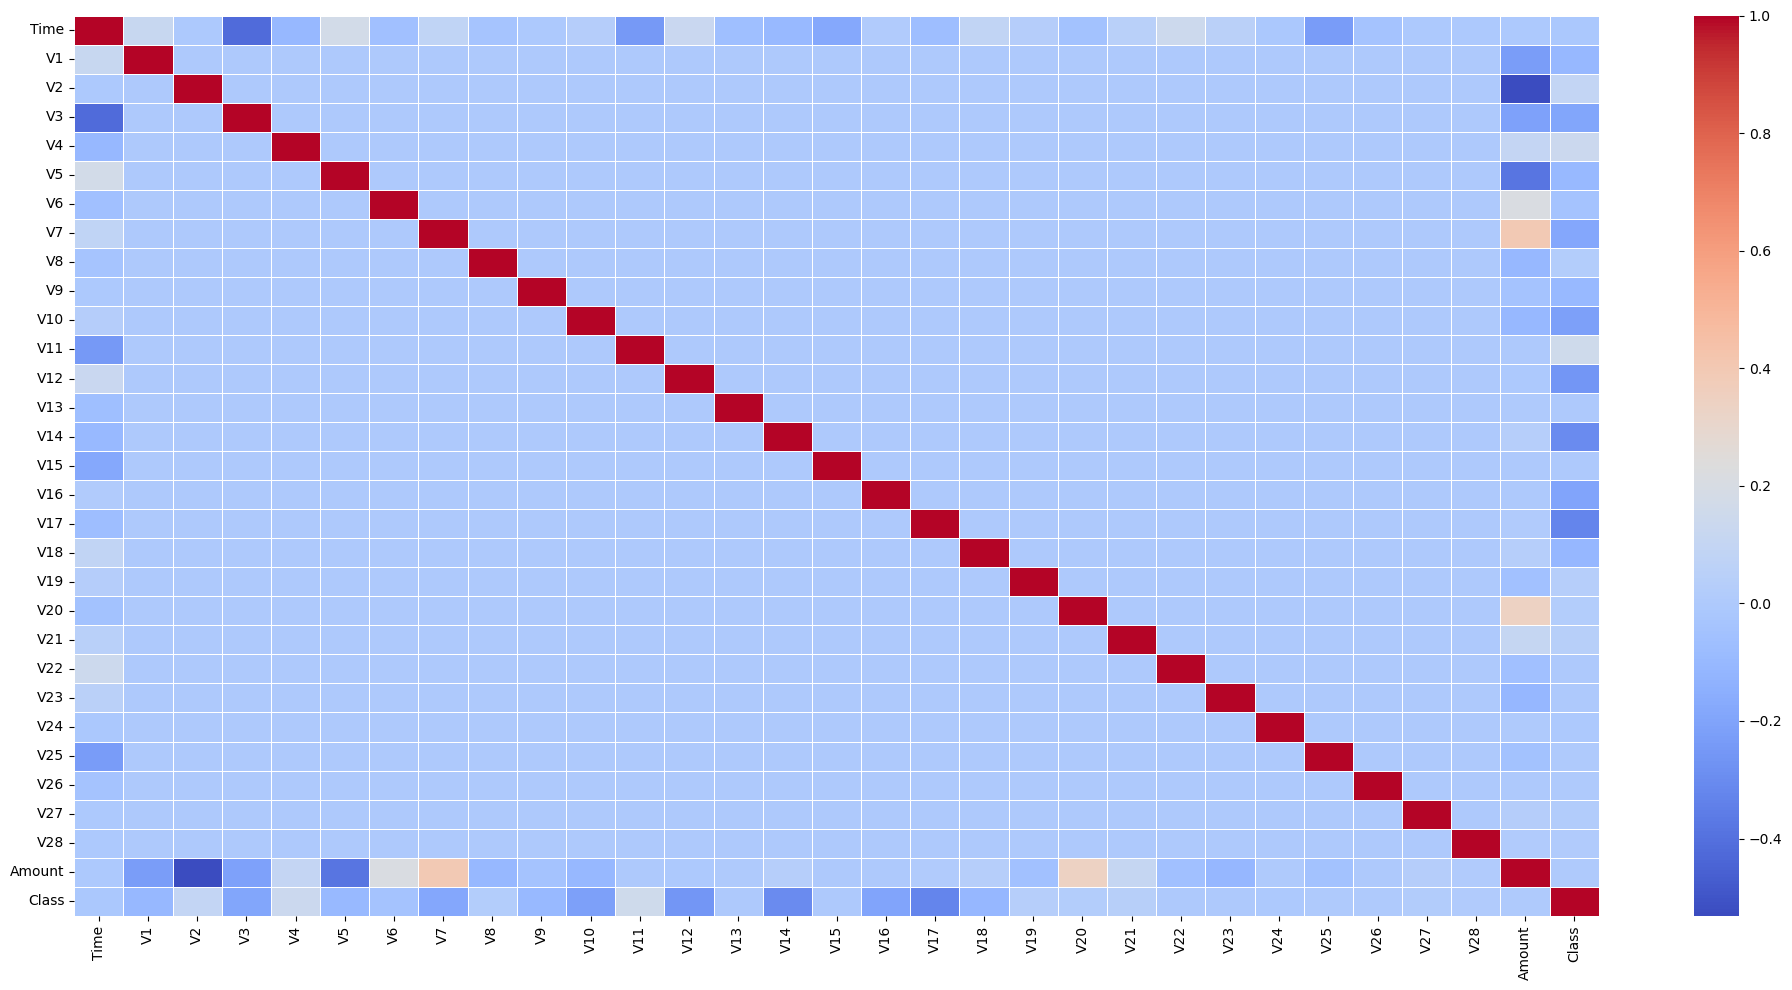

In [15]:
df_desbalanceado  = df.corr()

plt.figure(figsize=(20,10))
sns.heatmap(data=df_desbalanceado, annot=False, cmap='coolwarm', linewidths=.5)

plt.tight_layout()
plt.show()

## Visualização das Distribuições das Features PCA por Classe

In [8]:
PCA_features = df.iloc[:,1:29].columns

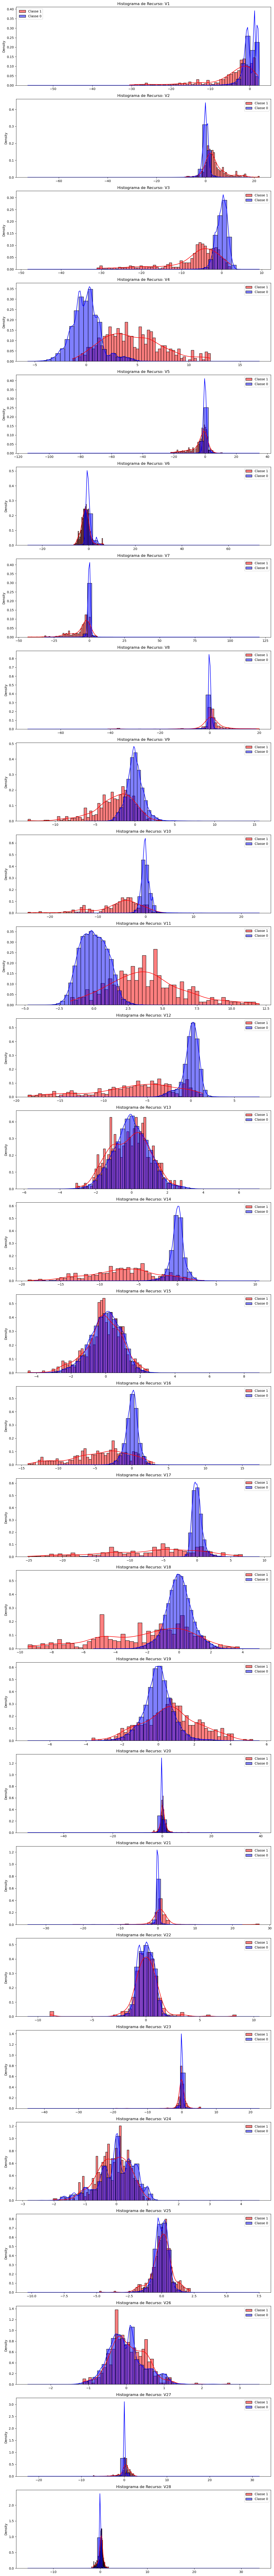

In [9]:
plt.figure(figsize=(12, 28 * 4))  # Cria figura grande para 28 gráficos verticais
gs = gridspec.GridSpec(28, 1)     # Define uma grade de 28 linhas e 1 coluna

for i, cn in enumerate(df[PCA_features]):
    ax = plt.subplot(gs[i])  # Subplot na linha i da grade

    # Histograma para classe 1
    sns.histplot(
        df[cn][df.Class == 1],
        bins=50,
        kde=True,
        stat='density',
        color='red',
        label='Classe 1',
        ax=ax
    )

    # Histograma para classe 0
    sns.histplot(
        df[cn][df.Class == 0],
        bins=50,
        kde=True,
        stat='density',
        color='blue',
        label='Classe 0',
        ax=ax
    )

    ax.set_xlabel('')
    ax.set_title('Histograma de Recurso: ' + str(cn))
    ax.legend()  # Mostra legenda das classes

plt.tight_layout()
plt.show()


- Após analise indetificamos que algumas features tem distribução normal para os dois tipos de transações, não vamos criar dois dataframe uma com todas as featuares e outra

In [1]:
df

NameError: name 'df' is not defined